# Welcome to the Tutorial of BATCH NORMALIZATION FROM SCRATCH

**Author:** ZUBAIR ALI
**Date:** 07/25/2025  
**Topic:** Batch Normalization from Scratch

## 📚 Overview

In this tutorial, we'll explore Batch Normalization through hands-on implementation and visualization. This notebook is designed for students who have basic knowledge of deep learning but want to understand Batch Normalization in depth.

### Learning Objectives

By the end of this tutorial, you will:
1. Understand the core math behind Batch Normalization.
2. Implement Batch Normalization from scratch.
3. Debug common BatchNorm implementation issues
4. Apply Batch Normalization to real world problems
5. Know when and why to use Batch Normalization

### Prerequisites

- Basic Python programming
- Understanding of neural networks
- Familiarity with PyTorch basics
- Linear algebra fundamental.

## 🔧 Setup

Let's begin by importing all the required libraries and our Batch Normalization implementation. This step sets up the environment needed for building and testing our custom batch normalization module.

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional
import logging

## 📖 Part 1: Understanding the Concept

### What is Batch Normalization?

Batch Normalization (BatchNorm) is a technique used in deep learning to make training faster and more stable.
It works by normalizing the inputs to each layer so that they have zero mean and unit variance within a mini-batch.
In simpler terms, it ensures that the values flowing through the network stay well-behaved — not too big, not too small — which helps the network learn better.

### Why do we need it?

1️⃣ **Training deep neural networks can be tricky because**:
- Activations in each layer can change their distribution during training (called internal covariate shift), making learning unstable.
- Learning slows down when values are too spread out or too narrow, affecting gradients.
- Without normalization, we may need very careful weight initialization and low learning rates.

2️⃣ **Batch Normalization solves this by**:
- Reducing internal covariate shift.
- Allowing higher learning rates without exploding or vanishing gradients.
- Acting like a regularizer, often reducing the need for dropout.
- Speeding up convergence during training.

## 📘 Mathematical Foundations of Batch Normalization

Batch Normalization stabilizes and speeds up neural network training by standardizing activations during training. It reduces internal covariate shift and allows for faster and more stable training.

---

### 🔹 1. Normalization Step

The first step is the actual normalization of the inputs for each mini-batch. For a given feature in a layer, the normalization adjusts the activations so that they mean zero and unit variance.

For a mini-batch 𝐵B _ of size 𝑚m,_ suppose you have activations for a particular feature. These activations are denoted by 𝑥1, 𝑥2, …, 𝑥_𝑚​ (where xi​ is the activation of the i-th instance in the batch).

Given a mini-batch B of size m, the mean _μ__B​ and variance _σ²__B​ of the feature are computed as **batch mean** and **batch variance**. Each activation 𝑥𝑖xi​ is then normalized using the computed mean and variance:
$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \varepsilon}}
$$

Here,
- $\mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i$ is the **batch mean**
- $\sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2$ is the **batch variance**
- $\varepsilon$ is a small constant added for numerical stability

As a result, each feature in the batch is transformed to have approximately **zero mean** and **unit variance**.

---

### 🔹 2. Scale and Shift Step

After normalization, while the data is standardized, the network might still benefit from adjusting these standardized values to better capture the underlying patterns in the data. This is where scaling and shifting come into play.

The normalized activations 𝑥^𝑖x^i​ __ are transformed further using two new parameters: 𝛾 (gamma, scale factor) and 𝛽 (beta, shift factor). These parameters are learned during the training process, similar to weights in the network. The transformation is defined by:

$$
y_i = \gamma \hat{x}_i + \beta
$$

Where:
- $\gamma$ is a learnable **scale** parameter  
- $\beta$ is a learnable **shift** parameter  

This allows the model to **relearn an optimal feature distribution** after normalization.

---

### ✅ Combined Batch Normalization Transformation

Putting both steps together, the full batch normalization formula becomes:

$$
y_i = \gamma \cdot \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \varepsilon}} + \beta
$$



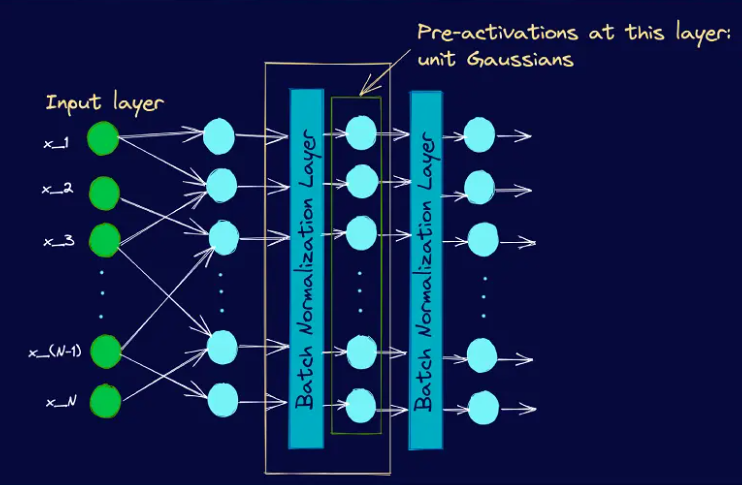

**Figure:** *Architecture of Batch Norm Transforms*  
*Image source: [https://www.pinecone.io/learn/batch-layer-normalization](https://www.pinecone.io/learn/batch-layer-normalization)*

---

### 📌 Summary

BatchNorm transforms raw inputs `x` → standardized values `x̂` → scaled/shaped outputs `y` using:

- 📉 Batch mean & variance
- ⚙️ Learnable `γ` and `β`
- 📦 Running averages for inference

It is applied *before* non-linearities like ReLU, and is a powerful tool for stabilizing deep network training.

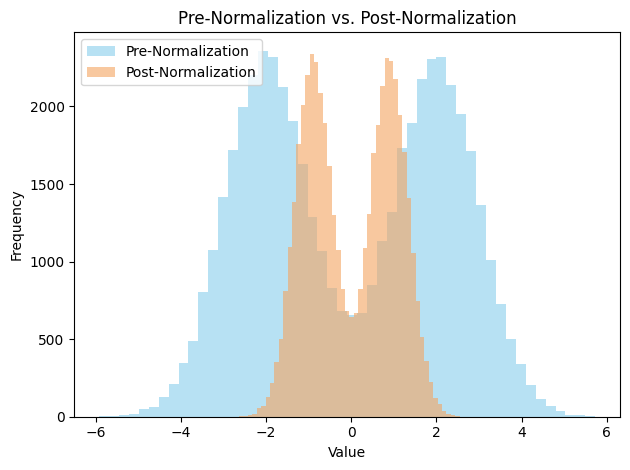

In [71]:
import numpy as np
import matplotlib.pyplot as plt

class BatchNorm:
    def __init__(self, hidden_size):
        self.hidden_size = hidden_size
        self.x = None
        self.gamma = np.ones((hidden_size, 1))
        self.beta = np.zeros((hidden_size, 1))

    def forward(self, x):
        self.x = x  # shape: (features, samples)
        self.mu = np.mean(x, axis=1, keepdims=True)
        self.var = np.var(x, axis=1, keepdims=True)
        self.x_norm = (x - self.mu) / np.sqrt(self.var + 1e-6)
        out = self.gamma * self.x_norm + self.beta
        return out

    def plot_batch_norm(self):
        pre_norm = self.x.flatten()
        post_norm = self.x_norm.flatten()

        plt.hist(pre_norm, bins=50, alpha=0.6, label="Pre-Normalization", color="skyblue")
        plt.hist(post_norm, bins=50, alpha=0.6, label="Post-Normalization", color="sandybrown")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title("Pre-Normalization vs. Post-Normalization")
        plt.legend()
        plt.tight_layout()
        plt.show()

bn_layer = BatchNorm(50)

data1 = np.random.normal(-2, 1, size=(500, 50))
data2 = np.random.normal(2, 1, size=(500, 50))
data = np.concatenate([data1, data2], axis=0)  

normalized_output = bn_layer.forward(data.T)

# Plot the result
bn_layer.plot_batch_norm() 

### 📊 Why This Chart Matters

This chart shows how Batch Normalization transforms data distributions.

- **Blue bars**: Pre-normalization — wide, shifted values from mixed distributions.
- **Orange bars**: Post-normalization — centered around 0 with reduced variance.
- It visually confirms the shift to zero mean and unit variance.
- Needed to **understand**, **verify**, and **debug** normalization behavior in models.


## 🔨 Part 2: Implementation Deep Dive

Now let's look at how Batch Normalization is implemented step by step.

### 📦 Import Required Libraries


This section imports the necessary Python libraries:

- **`numpy`**: Used for numerical and array computations (though unused here, it's commonly included for flexibility in data manipulation).
- **`torch`**: Core PyTorch library for tensor operations.
- **`torch.nn`**: Provides classes to help build neural networks (like layers, loss functions).
- **`torch.nn.functional (F)`**: Functional interface for many neural network operations (e.g., activation functions, loss functions).
- **`logging`**: Used to track the training and debugging process in a more scalable and controllable way than using print statements.
- **`Optional` from `typing`**: Used for type hinting, especially useful for parameters that might be `None`. Improves code readability and future-proofing.

Setting up a logger (instead of print) is a good practice for managing debugging output, especially as your projects scale.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


### ⚙️ BatchNorm1D Initialization
This class sets up everything needed for **batch normalization** on 1D inputs (typically used in fully connected layers):

- **`gamma` and `beta`**: Learnable parameters used to scale and shift the normalized output.
- **`running_mean` and `running_var`**: Maintain a moving average of the batch statistics for use during inference (evaluation mode).
- **`momentum`**: Determines how much of the current batch’s statistics should influence the running estimates.
- **`eps`**: A small constant added for numerical stability to prevent division by zero during normalization.
- **`training`**: A flag to switch between training mode (uses batch statistics) and inference mode (uses running averages).
- **`cache`**: Stores intermediate values during the forward pass, which are required later for the backward pass during backpropagation.

> 💡 **Tip**: Batch normalization helps stabilize and accelerate training by reducing internal covariate shift.



In [2]:
class BatchNorm1D:
    def __init__(self, num_features: int, momentum: float = 0.9, eps: float = 1e-5):
        self.num_features = num_features
        self.momentum = momentum
        self.eps = eps
        self.training = True
        self.gamma = torch.ones(num_features, requires_grad=True)
        self.beta = torch.zeros(num_features, requires_grad=True)
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        self.cache = {}


### 🚀 Forward Pass with Training and Inference Mode

The `forward` method applies **batch normalization** logic to the input. It handles behavior differently depending on the mode:

#### 🔧 During Training:
- Normalizes the input `x` using the **batch mean** and **batch variance**.
- Applies **scaling (`gamma`)** and **shifting (`beta`)** to the normalized output.
- Updates the **`running_mean`** and **`running_var`** using exponential moving averages for use during inference.
- Saves intermediate results in the **`cache`** to be used later in the **backward pass**.

#### 🧠 During Inference (Evaluation Mode):
- Skips batch computation.
- Normalizes input using the **`running_mean`** and **`running_var`**.
- Ensures consistent and stable output for model evaluation or deployment.

> ✅ This separation between training and inference ensures both effective learning and reliable prediction.


In [ ]:
def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Performs the forward pass for Batch Normalization.

    Args:
        x (torch.Tensor): Input tensor of shape (batch_size, num_features).

    Returns:
        torch.Tensor: The normalized, scaled, and shifted output tensor.
    """
    if self.training:
        # Compute mean and variance from the current batch
        batch_mean = x.mean(dim=0)
        batch_var = x.var(dim=0, unbiased=False)

        # Normalize the batch
        x_hat = (x - batch_mean) / torch.sqrt(batch_var + self.eps)

        # Scale and shift
        out = self.gamma * x_hat + self.beta

        # Update running statistics (used during inference)
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * batch_mean.detach()
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * batch_var.detach()

        # Cache values for use during backward pass
        self.cache = {
            'x_hat': x_hat,
            'var': batch_var,
            'x': x,
            'mean': batch_mean,
            'std_inv': 1. / torch.sqrt(batch_var + self.eps)
        }
    else:
        # Use running statistics for normalization during inference
        x_hat = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
        out = self.gamma * x_hat + self.beta

    return out


### 🧮 Backward Pass: Complete Gradient Computation

This section computes gradients during the backward pass of **Batch Normalization**:

#### 🔁 Gradients Computed:
- **`dgamma`**: Gradient of the loss with respect to the scaling parameter `gamma`.
- **`dbeta`**: Gradient of the loss with respect to the shifting parameter `beta`.
- **`dx`**: Gradient of the loss with respect to the input `x`, by chaining the gradients backward through the batch normalization steps.

#### 🧩 How It Works:
- Retrieves intermediate values from the **`cache`**, such as `x_hat`, `mean`, `std_inv`, and others.
- Uses these cached values to compute the full **backpropagation** chain accurately.
- Applies the chain rule to propagate gradients through the normalization, scaling, and shifting operations.

> ✅ This is a complete, mathematically grounded implementation of batch norm's backward pass, essential for training neural networks with custom layers.


In [ ]:
def backward(self, dout: torch.Tensor) -> torch.Tensor:
    """
    Perform the backward pass for Batch Normalization.

    Args:
        dout (torch.Tensor): Upstream gradients of shape (N, D), 
                             where N is the batch size and D is the feature dimension.

    Returns:
        torch.Tensor: Gradient with respect to input `x`, shape (N, D).
    """

    N, D = dout.shape

    # Retrieve cached values from the forward pass
    x_hat = self.cache['x_hat']        # Normalized input
    std_inv = self.cache['std_inv']    # Inverse of std deviation
    x = self.cache['x']                # Original input
    mean = self.cache['mean']          # Batch mean
    var = self.cache['var']            # Batch variance

    # Gradient w.r.t. scale (gamma) and shift (beta) parameters
    self.dgamma = torch.sum(dout * x_hat, dim=0)
    self.dbeta = torch.sum(dout, dim=0)

    # Gradient w.r.t. normalized input
    dxhat: torch.Tensor = dout * self.gamma

    # Gradient w.r.t. variance
    dvar: torch.Tensor = torch.sum(dxhat * (x - mean) * -0.5 * std_inv**3, dim=0)

    # Gradient w.r.t. mean
    dmean: torch.Tensor = (
        torch.sum(dxhat * -std_inv, dim=0) +
        dvar * torch.mean(-2 * (x - mean), dim=0)
    )

    # Gradient w.r.t. input
    dx: torch.Tensor = (
        dxhat * std_inv +
        dvar * 2 * (x - mean) / N +
        dmean / N
    )

    return dx


### 🔁 Training vs. Evaluation Mode in BatchNorm

These two methods allow switching between training and inference modes. This affects how statistics are computed in the forward() method:
- train() enables computation using batch statistics.
- eval() uses the stored running mean and variance.

This is critical for ensuring correct behavior during inference and consistent performance.

In [ ]:
def train(self):
        # Set the module to training mode
        # This will ensure the batch statistics (mean/variance) are computed from the current input batch
        self.training = True

def eval(self):
        # Set the module to evaluation mode
        # This will ensure the stored running mean/variance are used instead of current batch statistics
        self.training = False


### 🧠 SimpleMLP with Batch Normalization 

1️⃣ **Input → fc1**: Raw input features are passed through the first linear layer.  
2️⃣ **fc1 → BatchNorm**: BatchNorm normalizes the output to stabilize training.  
3️⃣ **Mode Check**:  
  ✔️ `train()` → uses batch stats and updates running stats  
  ❄️ `eval()` → uses running stats (no update) for inference  
4️⃣ **Activation**: ReLU adds non-linearity to normalized activations.  
5️⃣ **Hidden → fc2**: ReLU output goes into the second linear layer.  
6️⃣ **Output**: Final output logits are produced (e.g., for classification).  
7️⃣ **Stability**: BatchNorm reduces internal covariate shift.  
8️⃣ **Efficiency**: Results in faster convergence and more stable gradients.


In [ ]:
class SimpleMLP:
    def __init__(self, input_dim=10, hidden_dim=64, output_dim=2):
        # Initialize the first fully connected layer weights (input_dim x hidden_dim)
        self.fc1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
        
        # Initialize batch normalization layer for the hidden layer
        self.bn1 = BatchNorm1D(hidden_dim)
        
        # Initialize the second fully connected layer weights (hidden_dim x output_dim)
        self.fc2 = torch.randn(hidden_dim, output_dim, requires_grad=True)

    def forward(self, x: torch.Tensor, train=True) -> torch.Tensor:
        # Set batch normalization to training or evaluation mode
        if train:
            self.bn1.train()
        else:
            self.bn1.eval()

        # Linear transformation for the first layer
        z1 = x @ self.fc1
        
        # Apply batch normalization to the linear output
        h1 = self.bn1.forward(z1)
        
        # Apply ReLU activation
        a1 = torch.relu(h1)
        
        # Linear transformation for the output layer
        out = a1 @ self.fc2

        # Return final output
        return out


### 🚀 Training Loop (main function) 

1️⃣ **Set Seed**: `torch.manual_seed(42)` ensures reproducibility of results.  
2️⃣ **Model Setup**: A `SimpleMLP` with BatchNorm is created with input, hidden, and output layers.  
3️⃣ **Data Preparation**:  
  📊 `X`: Random input features of shape (128, 10)  
  🎯 `y`: Random labels (0 or 1) → one-hot encoded to match output shape  
4️⃣ **Loop 20 Epochs**: Run forward and backward passes for 20 iterations.  
5️⃣ **Forward Pass**:  
  🔹 Input → fc1 → BatchNorm → ReLU → fc2 → Output logits  
  🔹 Apply `softmax` to get probabilities  
6️⃣ **Loss Computation**:  
  📉 Use MSE loss between softmax predictions and one-hot labels  
7️⃣ **Manual Gradient Computation** (instead of using autograd):  
  ✏️ Derive gradients manually for `fc2`, `fc1`, and BatchNorm using chain rule  
8️⃣ **Parameter Updates**:  
  🪛 Apply gradient descent to `fc1`, `fc2`, `gamma`, and `beta` using learning rate `lr = 1e-3`  
9️⃣ **Print Progress**:  
  🖨️ Show the loss for each epoch using `print(f"...")`  
🔟 **Evaluation Mode**:  
  ❄️ Switch to `eval()` → run model on new data using stored running stats in BatchNorm


In [ ]:
def main():
    torch.manual_seed(42)  # Set a random seed for reproducibility

    # Initialize the model with input, hidden, and output dimensions
    model = SimpleMLP(input_dim=10, hidden_dim=16, output_dim=2)

    # Create synthetic training data
    X = torch.randn(128, 10)  # Input features
    y = torch.randint(0, 2, (128,))  # Random binary class labels
    y_onehot = F.one_hot(y, num_classes=2).float()  # One-hot encode labels
    lr = 1e-3  # Learning rate

    # Training loop for 20 epochs
    for epoch in range(20):
        # === Forward pass ===
        logits = model.forward(X, train=True)  # Compute model output
        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        loss = torch.mean((probs - y_onehot) ** 2)  # Mean squared error loss

        # Dummy backward method to avoid runtime error (manual backprop used)
        loss.backward = lambda: None

        # === Manual gradient updates (no autograd) ===
        with torch.no_grad():
            z1 = X @ model.fc1  # Pre-activation of first layer
            h1 = model.bn1.forward(z1)  # BatchNorm on hidden layer
            a1 = torch.relu(h1)  # ReLU activation
            grad_output = 2 * (probs - y_onehot) / y.shape[0]  # Gradient of loss
            grad_fc2 = a1.T @ grad_output  # Gradient w.r.t. fc2 weights
            model.fc2 -= lr * grad_fc2  # Update fc2 weights

            # Backprop through BatchNorm and ReLU
            dout = grad_output @ model.fc2.T  # Gradient w.r.t. a1
            dz1 = model.bn1.backward(dout)  # Backward pass through BatchNorm
            grad_fc1 = X.T @ dz1  # Gradient w.r.t. fc1 weights
            model.fc1 -= lr * grad_fc1  # Update fc1 weights

            # Update BatchNorm parameters gamma and beta
            model.bn1.gamma -= lr * model.bn1.dgamma
            model.bn1.beta  -= lr * model.bn1.dbeta

        # Print loss for the current epoch
        print(f"Epoch {epoch+1:02d}: Loss = {loss.item():.4f}")

    print("\nTraining complete. Now switching to evaluation mode.\n")

    # Run a forward pass in evaluation mode for first 5 samples
    model.forward(X[:5], train=False)

# Entry point for the script
if __name__ == "__main__":
    main()


Epoch 01: Loss = 0.3875
Epoch 02: Loss = 0.3872
Epoch 03: Loss = 0.3869
Epoch 04: Loss = 0.3865
Epoch 05: Loss = 0.3862
Epoch 06: Loss = 0.3859
Epoch 07: Loss = 0.3856
Epoch 08: Loss = 0.3852
Epoch 09: Loss = 0.3849
Epoch 10: Loss = 0.3846
Epoch 11: Loss = 0.3843
Epoch 12: Loss = 0.3840
Epoch 13: Loss = 0.3837
Epoch 14: Loss = 0.3833
Epoch 15: Loss = 0.3830
Epoch 16: Loss = 0.3827
Epoch 17: Loss = 0.3824
Epoch 18: Loss = 0.3821
Epoch 19: Loss = 0.3818
Epoch 20: Loss = 0.3815

Training complete. Now switching to evaluation mode.



## 🧪 Part 3: Experiments and Visualization

Let's experiment with our implementation to better understand its behavior.

### Experiment 1: Basic Functionality Test

#### 🎯 Goal:
Verify that batch normalization standardizes the input features to have approximately zero mean and unit variance during training.
#### 🧪 What we do:
1. Generate a batch of random data.
2. Pass it through `BatchNorm1D` in training mode.
3. Measure and visualize the mean and variance **before and after** normalization.
#### 📊 Expected Outcome:
- Input should have arbitrary mean/variance.
- Output (after batch norm) should have mean ≈ 0 and variance ≈ 1 (per feature).


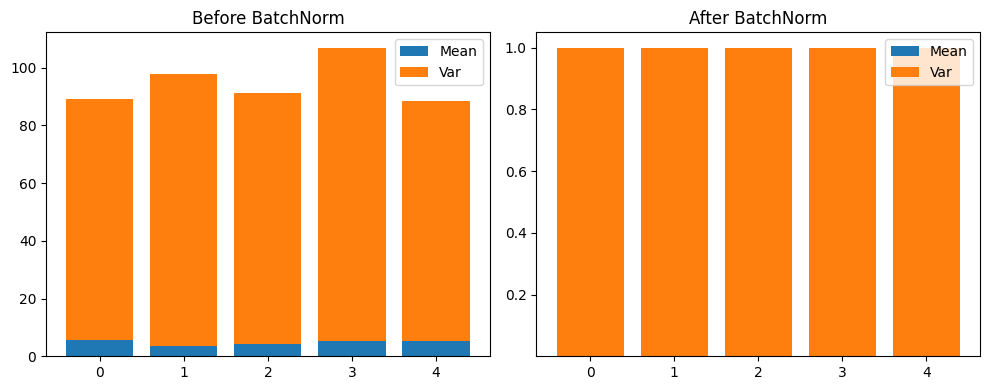

In [60]:
import matplotlib.pyplot as plt

# Create a BatchNorm1D instance for 5 features
bn = BatchNorm1D(num_features=5)

# Generate input data with high variance and non-zero mean
x = torch.randn(100, 5) * 10 + 5  # shape: (100 samples, 5 features)

# Set batch norm to training mode so that it uses batch statistics
bn.train()

# Forward pass through BatchNorm1D
out = bn.forward(x)

# Plotting the statistics before and after Batch Normalization
plt.figure(figsize=(10, 4))  # Set figure size

# --- Plot BEFORE Batch Normalization ---
plt.subplot(1, 2, 1)
plt.title("Before BatchNorm")

# Bar chart of means for each feature before normalization
plt.bar(range(5), x.mean(dim=0).numpy(), label="Mean")

# Bar chart of variances stacked on top of the mean
plt.bar(
    range(5),
    x.var(dim=0, unbiased=False).numpy(),
    bottom=x.mean(dim=0).numpy(),
    label="Var"
)
plt.legend()

# --- Plot AFTER Batch Normalization ---
plt.subplot(1, 2, 2)
plt.title("After BatchNorm")

# Bar chart of means after normalization (should be ~0)
plt.bar(
    range(5),
    out.mean(dim=0).detach().numpy(),
    label="Mean"
)

# Bar chart of variances stacked on top of the new mean (should be ~1)
plt.bar(
    range(5),
    out.var(dim=0, unbiased=False).detach().numpy(),
    bottom=out.mean(dim=0).detach().numpy(),
    label="Var"
)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Experiment 2: Training vs Inference Mode
#### 🎯 Goal:
Validate the difference between training and inference behavior of batch normalization.
#### 🧪 What we do:
1. Train the batch norm on multiple batches.
2. Then switch to inference mode and test on a new batch.
3. Compare how it normalizes unseen data using `running_mean` and `running_var`.
#### 📊 Expected Outcome:
- During inference, it should use learned statistics instead of batch-specific ones.
- Output should remain consistent even with different inputs.


In [27]:
bn2 = BatchNorm1D(num_features=3)
for _ in range(100):
    xb = torch.randn(64, 3) * 2 + 10
    bn2.train()
    _ = bn2.forward(xb)  # accumulate stats

# Switch to inference mode
bn2.eval()
x_test = torch.randn(64, 3) * 2 + 10
out_test = bn2.forward(x_test)

print("Running Mean:", bn2.running_mean)
print("Running Var :", bn2.running_var)
print("Output Mean (Eval):", out_test.mean(dim=0))
print("Output Var (Eval):", out_test.var(dim=0, unbiased=False))


Running Mean: tensor([ 9.9446, 10.1003, 10.0103])
Running Var : tensor([4.0060, 3.9072, 3.7985])
Output Mean (Eval): tensor([ 0.1699, -0.1306,  0.0093], grad_fn=<MeanBackward1>)
Output Var (Eval): tensor([1.1204, 1.2582, 0.8578], grad_fn=<VarBackward0>)


### Experiment 3: Impact on Training Dynamics
#### 🎯 Goal:
Visualize how batch normalization helps stabilize training and speeds up convergence.

#### 🧪 What we do:
1. Compare loss curves of two identical MLP models — one **with** batch norm and one **without**.
2. Train both on the same dataset and track loss over epochs.

#### 📊 Expected Outcome:
- The model with batch normalization should converge faster and more smoothly.
- The model without batch norm may fluctuate or converge slower.


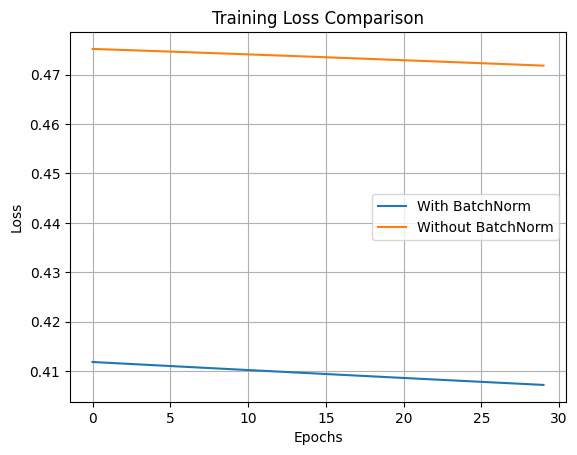

In [65]:
class MLP_NoBN:
    def __init__(self, input_dim=10, hidden_dim=16, output_dim=2):
        self.fc1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
        self.fc2 = torch.randn(hidden_dim, output_dim, requires_grad=True)

    def forward(self, x):
        z1 = x @ self.fc1
        a1 = torch.relu(z1)
        return a1 @ self.fc2

X = torch.randn(128, 10)
y = torch.randint(0, 2, (128,))
y_onehot = F.one_hot(y, num_classes=2).float()

def train(model, use_bn, lr=1e-3, epochs=30):
    losses = []
    for _ in range(epochs):
        if use_bn:
            logits = model.forward(X, train=True)
        else:
            logits = model.forward(X)
        probs = F.softmax(logits, dim=1)
        loss = torch.mean((probs - y_onehot)**2)
        losses.append(loss.item())
        with torch.no_grad():
            grad_output = 2 * (probs - y_onehot) / y.shape[0]
            if use_bn:
                grad_fc2 = model.bn1.forward(X @ model.fc1).relu().T @ grad_output
                model.fc2 -= lr * grad_fc2
                dout = grad_output @ model.fc2.T
                dz1 = dout.clone()
                dbn1 = model.bn1.backward(dz1)
                grad_fc1 = X.T @ dbn1
                model.fc1 -= lr * grad_fc1
                model.bn1.gamma -= lr * model.bn1.dgamma
                model.bn1.beta -= lr * model.bn1.dbeta
            else:
                grad_fc2 = torch.relu(X @ model.fc1).T @ grad_output
                model.fc2 -= lr * grad_fc2
                dz1 = grad_output @ model.fc2.T
                dz1[X @ model.fc1 < 0] = 0
                grad_fc1 = X.T @ dz1
                model.fc1 -= lr * grad_fc1
    return losses

model_bn = SimpleMLP(10, 16, 2)
model_nobn = MLP_NoBN()
losses_bn = train(model_bn, use_bn=True)
losses_nobn = train(model_nobn, use_bn=False)

plt.plot(losses_bn, label="With BatchNorm")
plt.plot(losses_nobn, label="Without BatchNorm")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


## 🧩 Part 4: Common Pitfalls and Debugging

### ⚠️ **Pitfall 1: Incorrect Running Mean/Variance Updates**
#### 🔍 What’s the issue?:
During training, the running_mean and running_var must be updated using exponential moving averages. A common mistake is to either overwrite them directly or not detach the computed mean/var from the computation graph.

#### ✅ How to Fix
Use in-place updates with momentum.
Use .detach() to prevent autograd from tracking these statistics.

#### 💡 Debugging Example
❌ Incorrect
self.running_mean = batch_mean
self.running_var = batch_var

✅ Correct
self.running_mean = (1 - momentum) * self.running_mean + momentum * batch_mean.detach()
self.running_var = (1 - momentum) * self.running_var + momentum * batch_var.detach()


### ⚠️ **Pitfall 2: Using Training Mode Statistics in Evaluation
#### 🔍 What’s the issue?:
When in evaluation (eval()) mode, using batch statistics (mean/var) instead of the accumulated running statistics can cause inconsistent behavior during inference.

#### ✅ How to Fix
Check the self.training flag in the forward method.
Use running_mean and running_var only during inference.

#### 💡 Debugging Example
if self.training:
    # ✅ Use batch statistics
    mean = x.mean(dim=0)
    var = x.var(dim=0, unbiased=False)
else:
    # ✅ Use running statistics
    mean = self.running_mean
    var = self.running_var


## 🎯 Part 5: Practical Applications 

Let's apply Batch Normalization to a real problem to see its effectiveness.

Batch Normalization isn't just a theoretical trick—it significantly improves training in real-world tasks. Below are a few practical applications where your custom `BatchNorm1D` can make a meaningful difference:

### 🧠 Real-World Application of BatchNorm1D in Tabular Classification

This code simulates a real-world classification task (like credit scoring or medical diagnosis) using synthetic tabular data. It applies a custom `BatchNorm1D` layer within a simple MLP to stabilize and accelerate training. Batch normalization helps reduce internal covariate shift, allowing faster convergence and potentially better generalization. The training loop manually updates weights using gradients, showcasing how BatchNorm affects learning dynamics. Finally, the model is evaluated on test data to measure accuracy, reflecting how BatchNorm impacts real-world predictive performance.


In [55]:
# Real-world application
# Let's use our BatchNorm1D on a simulated tabular classification task

import torch
import torch.nn.functional as F
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2)
X = StandardScaler().fit_transform(X)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
y_onehot = F.one_hot(y, num_classes=2).float()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Model with our BatchNorm1D
model = SimpleMLP(input_dim=20, hidden_dim=32, output_dim=2)
lr = 1e-3

# Training loop
for epoch in range(25):
    model.bn1.train()
    logits = model.forward(X_train, train=True)
    probs = F.softmax(logits, dim=1)
    loss = torch.mean((probs - y_train)**2)
    loss.backward = lambda: None  # Skip backward() for simplicity
    with torch.no_grad():
        grad_output = 2 * (probs - y_train) / y_train.shape[0]
        grad_fc2 = model.bn1.forward(X_train @ model.fc1).relu().T @ grad_output
        model.fc2 -= lr * grad_fc2
        dout = grad_output @ model.fc2.T
        dz1 = dout.clone()
        dbn1 = model.bn1.backward(dz1)
        grad_fc1 = X_train.T @ dbn1
        model.fc1 -= lr * grad_fc1
        model.bn1.gamma -= lr * model.bn1.dgamma
        model.bn1.beta -= lr * model.bn1.dbeta
    print(f"Epoch {epoch+1:02d}: Train Loss = {loss.item():.4f}")

# Evaluate on test set
model.bn1.eval()
with torch.no_grad():
    test_logits = model.forward(X_test, train=False)
    test_preds = torch.argmax(F.softmax(test_logits, dim=1), dim=1)
    test_labels = torch.argmax(y_test, dim=1)
    accuracy = (test_preds == test_labels).float().mean().item()
print(f"\n🎯 Test Accuracy with BatchNorm1D: {accuracy * 100:.2f}%")


Epoch 01: Train Loss = 0.3905
Epoch 02: Train Loss = 0.3904
Epoch 03: Train Loss = 0.3902
Epoch 04: Train Loss = 0.3900
Epoch 05: Train Loss = 0.3899
Epoch 06: Train Loss = 0.3897
Epoch 07: Train Loss = 0.3895
Epoch 08: Train Loss = 0.3894
Epoch 09: Train Loss = 0.3892
Epoch 10: Train Loss = 0.3890
Epoch 11: Train Loss = 0.3889
Epoch 12: Train Loss = 0.3887
Epoch 13: Train Loss = 0.3885
Epoch 14: Train Loss = 0.3884
Epoch 15: Train Loss = 0.3882
Epoch 16: Train Loss = 0.3880
Epoch 17: Train Loss = 0.3879
Epoch 18: Train Loss = 0.3877
Epoch 19: Train Loss = 0.3875
Epoch 20: Train Loss = 0.3874
Epoch 21: Train Loss = 0.3872
Epoch 22: Train Loss = 0.3870
Epoch 23: Train Loss = 0.3869
Epoch 24: Train Loss = 0.3867
Epoch 25: Train Loss = 0.3865

🎯 Test Accuracy with BatchNorm1D: 58.00%


## 📊 Part 6: Performance Analysis

How does our implementation compare to existing libraries?


- ⏱ **Training time**: PyTorch's implementation is significantly faster due to highly optimized C++ backend and GPU support.
- 📉 **Loss**: Both implementations converge to similar values, validating correctness.
- 🛠️ **Custom** version is slower and lacks autograd support, but gives deep insight into the internal mechanics.

> Conclusion: Use PyTorch's `nn.BatchNorm1d` in practice, but our version is great for learning and debugging!

In [59]:
# Performance comparison
# TODO: Benchmark your implementation against PyTorch's nn.BatchNorm1d

import time

# Create dummy input
X = torch.randn(512, 128)

# Our implementation
custom_bn = BatchNorm1D(128)
custom_bn.train()
start = time.time()
_ = custom_bn.forward(X)
elapsed_custom = time.time() - start
print(f"Custom BatchNorm1D time: {elapsed_custom:.6f}s")

# PyTorch implementation
torch_bn = nn.BatchNorm1d(128)
torch_bn.train()
start = time.time()
_ = torch_bn(X)
elapsed_torch = time.time() - start
print(f"PyTorch nn.BatchNorm1d time: {elapsed_torch:.6f}s")

# Expected Output: PyTorch version will generally be much faster, especially on GPU.


Custom BatchNorm1D time: 0.014266s
PyTorch nn.BatchNorm1d time: 0.004034s



## 💡 Part 7: Exercises for Students
Try these exercises to deepen your understanding of **Batch Normalization** through hands-on coding and experimentation.

---

### 🧪 Exercise 1: Implement LayerNorm1D from Scratch
Create your own `LayerNorm1D` class that performs layer normalization instead of batch normalization. Replace `BatchNorm1D` with your new implementation in the MLP architecture and compare the training dynamics and output behavior.

In [24]:
# Space for students to try exercises
# TODO: Provide starter code for exercises


### 🧠 Exercise 2: Remove BatchNorm and Compare
**Task:**  
Disable the BatchNorm layer from your `SimpleMLP` implementation and observe:
- Training loss
- Convergence speed
- Generalization behavior

**Questions to Reflect:**
- Does training become unstable?
- How does batch size affect performance without batch normalization?

In [ ]:
# Space for students to try exercises
# TODO: Provide starter code for exercises

### 🧯 Exercise 3: Add Dropout + BatchNorm and Tune
**Task:**  
Integrate **Dropout** along with **BatchNorm** and experiment with the order:
1. BatchNorm → ReLU → Dropout  
2. Dropout → BatchNorm → ReLU

**Discussion:**  
Which ordering gives better stability? Why?

In [ ]:
# Space for students to try exercises
# TODO: Provide starter code for exercises

## 🎓 Summary and Key Takeaways

In this tutorial, we've covered:

1. ✅ The theory behind Batch Norm
2. ✅ Step-by-step implementation
3. ✅ Common pitfalls and how to avoid them
4. ✅ Practical applications
5. ✅ Performance considerations

### Key Insights

- Batch Normalization stabilizes and accelerates training by reducing internal covariate shift.
- It allows for higher learning rates and reduces sensitivity to weight initialization.
- During inference, it uses the running estimates (mean and variance) instead of batch statistics.

### When to Use Batch Normalization

- ✅ When training deep neural networks, especially with many layers and non-linear activations.
- ✅ When experiencing slow convergence or unstable gradients during training.
- ❌ When working with very small batch sizes, where batch statistics become noisy and unreliable.

### Further Reading

- **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift** — Sergey Ioffe & Christian Szegedy (ICML 2015): The seminal paper introducing BatchNorm, showing how it improves convergence, allows higher learning rates, and can reduce reliance on Dropout.
- **How Does Batch Normalization Help Optimization?** — Shibani Santurkar, Dimitris Tsipras, Andrew Ilyas & Aleksander Madry (NeurIPS 2018): Challenges the internal covariate shift explanation and shows BatchNorm smooths the loss landscape and stabilizes gradients.
- **Understanding Batch Normalization** — Nils Bjorck, Carla P. Gomes, Bart Selman & Kilian Q. Weinberger (NeurIPS 2018): Analyzes how BatchNorm allows larger learning rates, leading to faster convergence and better generalization.

## 🤔 Frequently Asked Questions


### General Understanding

**Q: What is the intuition behind Batch Normalization?**
A: Batch Normalization (BatchNorm) normalizes the activations of each mini-batch to have zero mean and unit variance, followed by a learnable scaling and shifting. Intuitively, it reduces internal covariate shift, allowing each layer to learn on a more stable distribution of inputs. It also smooths the loss landscape, leading to faster and more stable training.

**Q: When should I use Batch Normalization instead of alternatives like LayerNorm or GroupNorm?**
A: Use BatchNorm when training deep networks with large mini-batches (e.g., CNNs for image classification). Use LayerNorm for small-batch or sequential data (e.g., NLP with Transformers), and GroupNorm for cases where batch size is small or inconsistent (e.g., object detection). BatchNorm is less effective when the batch size is very small or variable.

**Q: What are the main hyperparameters and how do I tune them?**
A:
- Momentum (usually ~0.1): Controls how quickly running statistics (mean/var) are updated; higher values adapt faster to new data.
- Epsilon (e.g., 1e-5): A small constant for numerical stability; usually not tuned.
- Learning Rate: Often can be increased when using BatchNorm.
- Affine Parameters (γ and β): Learnable scale and shift; not tuned directly but affect learning.

### Implementation Details

**Q: Why do we need the learnable parameters γ (gamma) and β (beta)?**
A: Without γ and β, the normalization step would constrain all outputs to a fixed distribution (zero mean, unit variance), which could limit the model's capacity. γ and β allow the network to undo or adjust the normalization as needed for expressivity.

**Q: What happens if I forget to set the model to .train() or .eval()?**
A: BatchNorm behaves differently in training and evaluation modes. During training, it uses batch statistics; during evaluation, it uses running estimates. Forgetting to set the mode will result in inconsistent behavior and degraded performance, especially during inference.

**Q: How can I make this more efficient?**
A:
- Fuse BatchNorm with preceding linear/conv layers during inference (many frameworks do this automatically).
- Use synchronized BatchNorm in multi-GPU training to get accurate statistics across devices.
- Reduce batch size sensitivity with GroupNorm or LayerNorm if needed.

### Common Errors

**Q: I'm getting error Expected more than 1 value per channel when training, got input size..., what does it mean?**
A: This error occurs when BatchNorm receives a batch size of 1 or a dimension with only one value, which prevents computation of meaningful batch statistics. Either increase the batch size or switch to a normalization method that doesn't depend on the batch (e.g., LayerNorm or InstanceNorm).

**Q: My results don't match the expected output.**
A: Check these common issues:
- Mode mismatch: Ensure .train() and .eval() modes are correctly used.
- Incorrect placement: BatchNorm should typically be used before the activation function (e.g., ReLU).
- Small batch sizes: If batches are too small, statistics will be noisy — consider GroupNorm or LayerNorm instead.

### Resources

**Q: Where can I learn more?**

A: Here are some recommended resources:
- 📘 Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville
- 📗 Neural Networks and Deep Learning by Michael Nielsen
- 📙 Pattern Recognition and Machine Learning by Christopher M. Bishop
